In [1]:
import keras 

Using TensorFlow backend.


路透社数据集

In [2]:
from keras.datasets import reuters

(train_data, train_labels),(test_data,test_labels) = reuters.load_data(num_words=10000)

In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
# 将索引解码为新闻文本
#word_index = reuters.get_word_index()
#reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
#decoded_newswire = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

准备数据

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
# 使用one_hot编码 
def to_one_hot(labels,dimension=46):
    results = np.zeros((len(labels),dimension))
    for i,label in enumerate(labels):
        results[i,label]=1
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [8]:
# 使用keras内置方法实现上述one_hot编码
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

构建网络

In [9]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [10]:
#编译模型
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

验证

In [15]:
#留出1000个样本作为验证集
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_value = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [16]:
#训练模型
history=model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_value))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 217us/step - loss: 2.5308 - accuracy: 0.5291 - val_loss: 1.6656 - val_accuracy: 0.6460
Epoch 2/20
7982/7982 [==============================] - 1s 159us/step - loss: 1.3604 - accuracy: 0.7137 - val_loss: 1.2686 - val_accuracy: 0.7120
Epoch 3/20
7982/7982 [==============================] - 1s 154us/step - loss: 1.0160 - accuracy: 0.7876 - val_loss: 1.1398 - val_accuracy: 0.7660
Epoch 4/20
7982/7982 [==============================] - 1s 153us/step - loss: 0.8032 - accuracy: 0.8346 - val_loss: 1.0153 - val_accuracy: 0.7900
Epoch 5/20
7982/7982 [==============================] - 1s 152us/step - loss: 0.6346 - accuracy: 0.8680 - val_loss: 0.9711 - val_accuracy: 0.8060
Epoch 6/20
7982/7982 [==============================] - 1s 149us/step - loss: 0.5039 - accuracy: 0.8951 - val_loss: 0.9222 - val_accuracy: 0.8140
Epoch 7/20
7982/7982 [==============================] - 1s 150us/step - loss

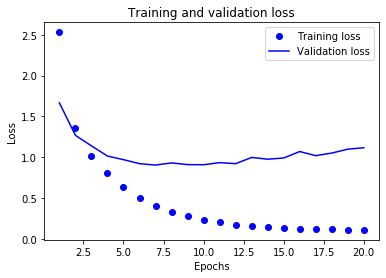

In [18]:
#绘制训练损失和验证损失
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,loss,'bo',label='Training loss')   # bo表示蓝色圆点
plt.plot(epochs,val_loss,'b',label='Validation loss')  # b表示蓝色实线
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()               # 加上图例
plt.show()

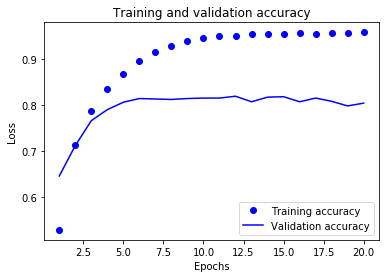

In [22]:
# 绘制训练精度和验证精度
plt.clf()  # 清空图像
acc = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training accuracy')   # bo表示蓝色圆点
plt.plot(epochs,val_accuracy,'b',label='Validation accuracy')  # b表示蓝色实线
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()               # 加上图例
plt.show()

In [24]:
#从头开始重新训练一个模型
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
results=model.evaluate(x_test,one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 162us/step - loss: 2.6167 - accuracy: 0.4997 - val_loss: 1.7174 - val_accuracy: 0.6440
Epoch 2/8
7982/7982 [==============================] - 1s 151us/step - loss: 1.4107 - accuracy: 0.7046 - val_loss: 1.3180 - val_accuracy: 0.7090
Epoch 3/8
7982/7982 [==============================] - 1s 155us/step - loss: 1.0520 - accuracy: 0.7707 - val_loss: 1.1531 - val_accuracy: 0.7400
Epoch 4/8
7982/7982 [==============================] - 1s 153us/step - loss: 0.8365 - accuracy: 0.8197 - val_loss: 1.0425 - val_accuracy: 0.7860
Epoch 5/8
7982/7982 [==============================] - 1s 152us/step - loss: 0.6673 - accuracy: 0.8596 - val_loss: 0.9973 - val_accuracy: 0.7840
Epoch 6/8
7982/7982 [==============================] - 1s 153us/step - loss: 0.5368 - accuracy: 0.8899 - val_loss: 0.9548 - val_accuracy: 0.7910
Epoch 7/8
7982/7982 [==============================] - 1s 155us/step - loss: 0.431

In [25]:
results

[1.00210316438072, 0.7831701040267944]

In [26]:
#完全随机精度
import copy
test_labels_copy=copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels)==np.array(test_labels_copy)
float(np.sum(hits_array))/len(test_labels)

0.176313446126447

新数据上生成预测结果

In [29]:
#在新数据上生成预测结果
predictions=model.predict(x_test)

In [30]:
predictions[0].shape

(46,)

In [31]:
np.sum(predictions[0])

0.99999994

In [32]:
np.argmax(predictions[0])

3

处理标签和损失的另一种方法

In [33]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [34]:
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])